In [4]:
more bank_data.csv

In [5]:
import numpy as np
import pandas as pd
import os

__LOAD DATA 'bank_data.csv'__

In [6]:
bankdf = pd.read_csv('bank_data.csv')

## __1. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.__

## Exploratory of dataframe:

In [7]:
#dimension and datatype
shape = bankdf.shape
types = bankdf.dtypes
print 'shape: ',shape
print types

shape:  (600, 12)
id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object


**summary of dataframe:** 

(12 columns and 600 rows)

**Numerical:**  
age  
income  
children   

**Categorical:**  
id  
gender  
region  
married  
car  
savings_acct  
current_acct  
mortgage  
pep  

In [15]:
# first 4 records of dataframe
bankdf.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


## Exploratory of  numerical attributes:

In [16]:
#summary of Numerical attributes
bankdf.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


__summary of Numerical attributes:__  

__*age__  
mean: 42.395   
standard dev.: 14.43  
min: 18   
Q1: 30  
Median: 42  
Q3: 55.25  
max: 67  

__*income__  
mean: ~27524  
standard dev.: 12899.47  
min: ~5014   
Q1: 17264.5  
Median: 24925.3  
Q3: 36172.68 
max: 63130.1  



__*children__  
mean: 1.011667  
standard dev.: 1.056752  
min: 0     
Q1: 0    
Median: 1  
Q3: 2  
max: 3   



In [8]:
import matplotlib.pyplot as plt
import pylab
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

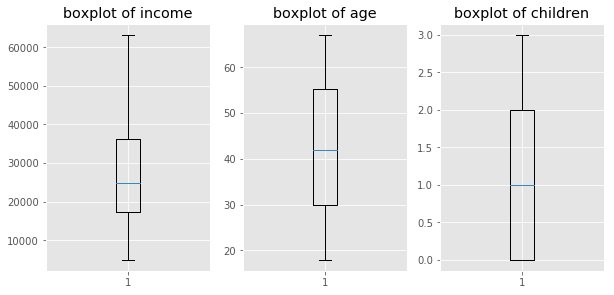

In [9]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,3,1) 
ax1.boxplot(bankdf['income'])
ax1.set_title("boxplot of income")
ax2 = fig.add_subplot(2,3,2) 
ax2.boxplot(bankdf['age'])
ax2.set_title("boxplot of age")
ax2 = fig.add_subplot(2,3,3)
ax2.boxplot(bankdf['children'])
ax2.set_title("boxplot of children")

plt.show()

the plots above are boxplot of the numerical variables that shows the five number summary of data of age,children and income

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112a2b490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113dfdad0>]], dtype=object)

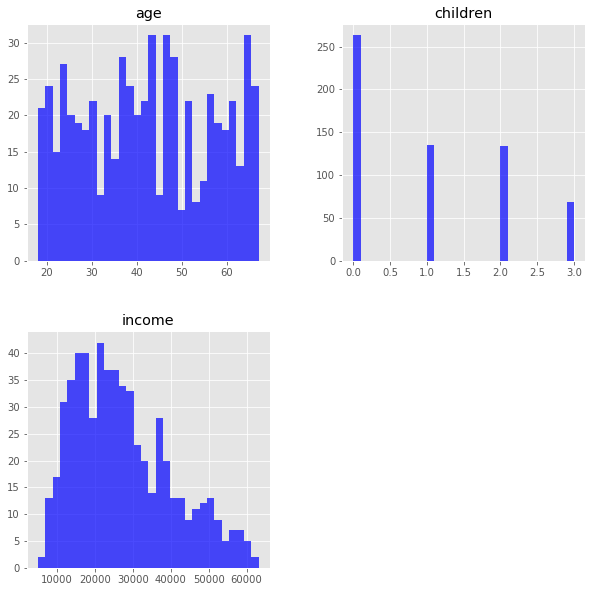

In [10]:
#histogram of numerical attirbutes
bankdfnum=bankdf[['income','age','children']]
plt.figure()
bankdfnum.hist(color='blue',alpha=0.7, bins =30,figsize=(10, 10) )

the plots above are histogram of the numerical variables that shows the distribution of data of age,chidren and income

In [112]:
#correlation
bankdf[["age","income","children"]].corr()

,age,income,children
age,1.000000,0.752726,0.023572
income,0.752726,1.000000,0.036761
children,0.023572,0.036761,1.000000


Based on the correlation matrix, we obeserve that age and income are higly and postively correlated(corr= ~0.75)

## Exploratory of categorical attributes:

In [11]:
bankdfcat = bankdf.drop('income',axis=1)
bankdfcat=bankdfcat.drop('age',axis=1)
bankdfcat=bankdfcat.drop('children',axis=1)
bankdfcat=bankdfcat.drop('id',axis=1)
bankdfcat.head()

,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [140]:
#summary of categorical attributes
bankdfcat.describe()

,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600,600,600,600,600,600,600,600
unique,2,4,2,2,2,2,2,2
top,MALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,300,269,396,304,414,455,391,326


**Intepretaion of the table aboved**  

count: number of observation    
unique: unique value of each column (e.g. two unique value("male" and "female") in column "Gender")  
top:the most frequent observation in the column  
freq:the number of the most frequent observation in the column  

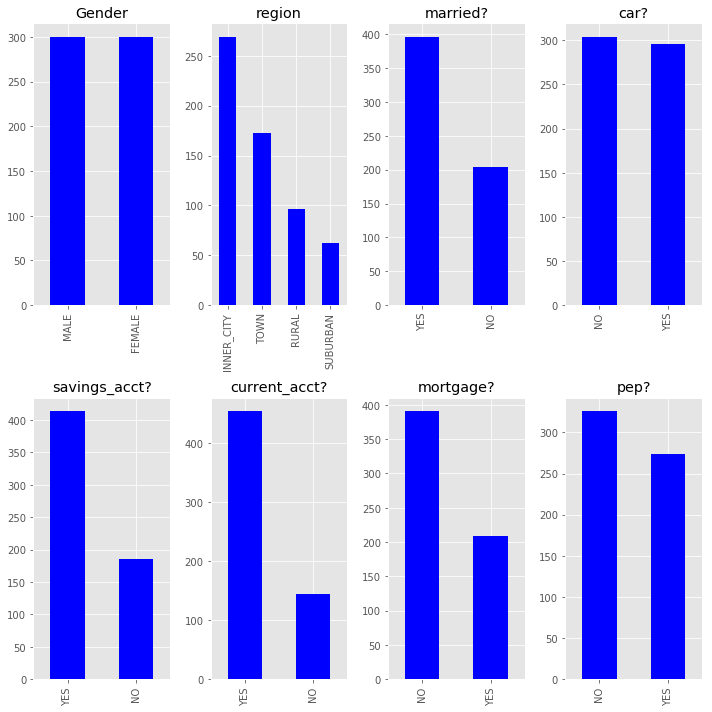

In [29]:
#barplot of categorical attirbutes

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,4,1)
ax1.set_title("Gender")
bankdfcat['gender'].value_counts().plot(kind='bar',color='blue')

ax2 = fig.add_subplot(2,4,2)
ax2.set_title("region")
bankdfcat['region'].value_counts().plot(kind='bar',color='blue')

ax3 = fig.add_subplot(2,4,3)
ax3.set_title("married?")
bankdfcat['married'].value_counts().plot(kind='bar',color='blue')

ax4 = fig.add_subplot(2,4,4)
ax4.set_title("car?")
bankdfcat['car'].value_counts().plot(kind='bar',color='blue')

ax5 = fig.add_subplot(2,4,5)
ax5.set_title("savings_acct?")
bankdfcat['savings_acct'].value_counts().plot(kind='bar',color='blue')

ax6 = fig.add_subplot(2,4,6)
ax6.set_title("current_acct?")
bankdfcat['current_acct'].value_counts().plot(kind='bar',color='blue')

ax7 = fig.add_subplot(2,4,7)
ax7.set_title("mortgage?")
bankdfcat['mortgage'].value_counts().plot(kind='bar',color='blue')

ax8 = fig.add_subplot(2,4,8)
ax8.set_title("pep?")
bankdfcat['pep'].value_counts().plot(kind='bar',color='blue')

fig.tight_layout()

plt.show()

From the bar plots above, we can see the distribution of each categorical column!   
e.g. We can see that frequency of gender is evenly distributed which meean each gender have equal number of instances(300) while frequency of  other attributes are not evenly distributed.

## 2. Suppose that because of the bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [179]:
#summary of Numerical attributes in two group(pep=yes and pep =no)
bankdf.groupby("pep").describe()

age    children        income
pep                                            
NO  count  326.000000  326.000000    326.000000
    mean    40.098160    1.067485  24900.953374
    std     14.123506    1.195524  11661.123422
    min     18.000000    0.000000   5014.210000
    25%     27.000000    0.000000  15366.475000
    50%     40.000000    0.000000  23105.000000
    75%     51.000000    2.000000  31210.900000
    max     67.000000    3.000000  61554.600000
YES count  274.000000  274.000000    274.000000
    mean    45.127737    0.945255  30644.919453
    std     14.327991    0.860571  13609.613043
    min     18.000000    0.000000   7756.360000
    25%     34.000000    0.000000  19639.475000
    50%     45.000000    1.000000  28080.050000
    75%     58.000000    1.000000  38458.350000
    max     67.000000    3.000000  63130.100000

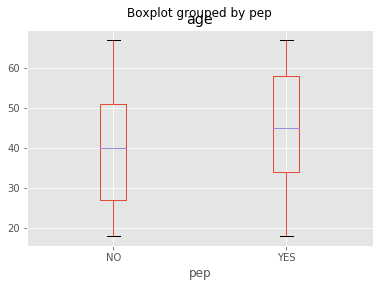

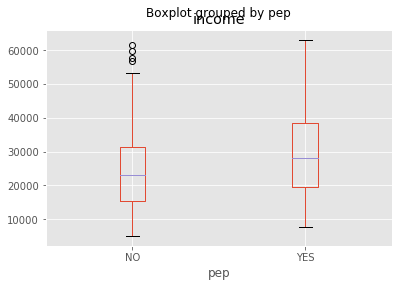

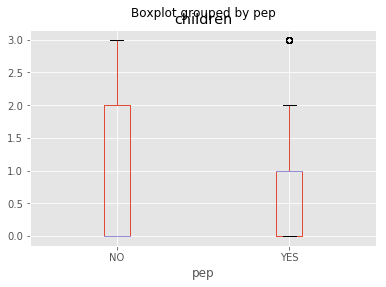

In [34]:
fig = plt.figure(figsize=(10, 10))


a= bankdf.boxplot(column= 'age',by='pep')

b= bankdf.boxplot(column= 'income',by='pep')
c= bankdf.boxplot(column= 'children',by='pep')

plt.show()

__few significant differences are dectected from the table and boxplots above(nuemerical):__  

people who purchase pep are about 5 year older than people who dont purchase pep in average(~45 vs ~40)
people who purchase pep have significant higher income than people who dont purchase pep in average(~30645 vs ~24901)  



In [171]:
#summary of categorical attributes in two group(pep=yes and pep =no)
bankdfcat.groupby("pep").describe()

car current_acct  gender married mortgage      region savings_acct
pep                                                                           
NO  count   326          326     326     326      326         326          326
    unique    2            2       2       2        2           4            2
    top      NO          YES  FEMALE     YES       NO  INNER_CITY          YES
    freq    168          244     170     242      209         146          235
YES count   274          274     274     274      274         274          274
    unique    2            2       2       2        2           4            2
    top     YES          YES    MALE     YES       NO  INNER_CITY          YES
    freq    138          211     144     154      182         123          179

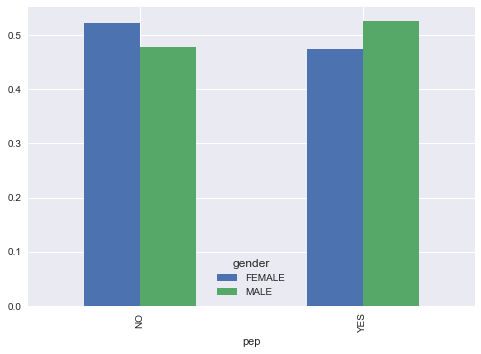

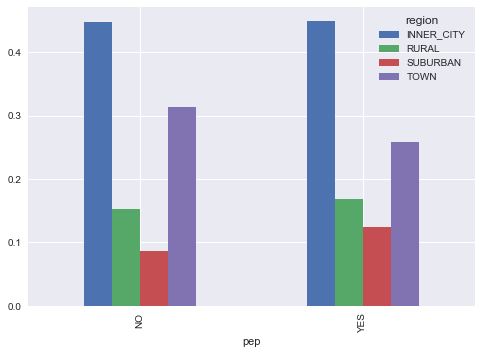

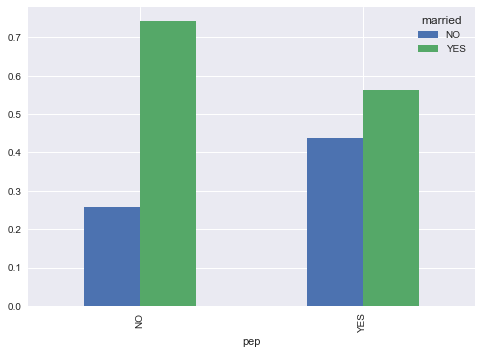

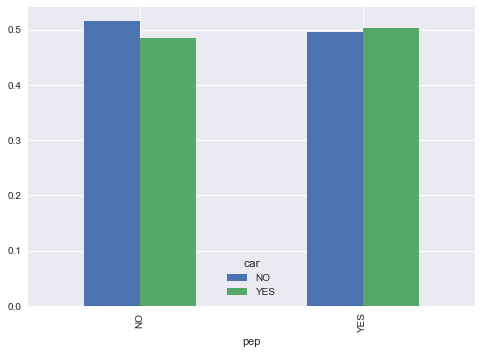

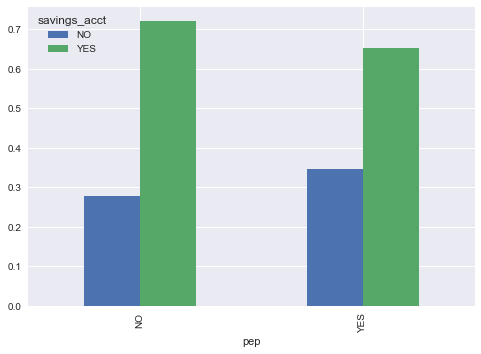

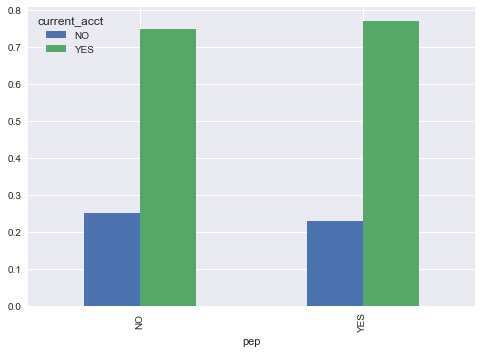

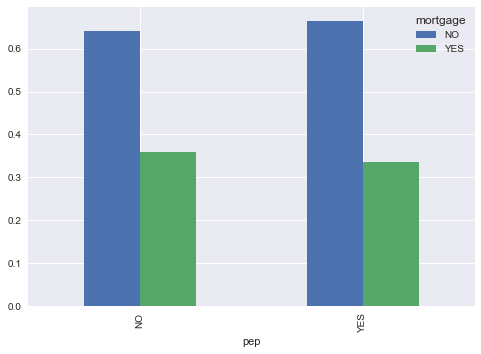

In [156]:
#barplot
categorical_fields = ['gender','region','married','car','savings_acct','current_acct','mortgage']

for i in range(len(categorical_fields)):

    crosstab_data = pd.crosstab(bankdf['pep'],bankdf[categorical_fields[i]]).apply(lambda x: x/x.sum(), 1)
    plt.show(crosstab_data.plot(kind="bar"))

__few significant differences are dectected from the table and barplots above(categorical):__  

people who purchase pep are more likely to be male, be married, live in the city, have saving account ,have current acount,or withount mortgate.


## 3. Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [85]:
inc_z = (bankdf["income"] - bankdf["income"].mean()) / bankdf["income"].std()
inc_z.head(5)

0   -0.773523
1    0.198541
2   -0.848766
3   -0.554180
4    1.787071
Name: income, dtype: float64

In [87]:
bankdf.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


## 4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [ ]:
"young", "mid-age", "old

In [97]:
age_bins = pd.qcut(bankdf.age, 3, labels = ['young', 'mid-age', 'old'],retbins= True)
age_bins


(0      mid-age
 1      mid-age
 2          old
 3        young
 4          old
 5          old
 6        young
 7          old
 8      mid-age
 9          old
 10         old
 11         old
 12     mid-age
 13         old
 14     mid-age
 15     mid-age
 16     mid-age
 17     mid-age
 18         old
 19       young
 20         old
 21         old
 22         old
 23       young
 24       young
 25         old
 26     mid-age
 27     mid-age
 28     mid-age
 29         old
         ...   
 570    mid-age
 571    mid-age
 572      young
 573    mid-age
 574    mid-age
 575    mid-age
 576      young
 577        old
 578      young
 579    mid-age
 580        old
 581      young
 582    mid-age
 583    mid-age
 584      young
 585      young
 586      young
 587    mid-age
 588        old
 589      young
 590      young
 591    mid-age
 592    mid-age
 593        old
 594        old
 595        old
 596      young
 597      young
 598      young
 599    mid-age
 Name: age, dtype: categ

## 5. Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0.

In [112]:
min_max = lambda x: ((x - x.min()) / (x.max()-x.min())) if (x.dtypes != object) else x
bk_std = bankdf.copy().apply(min_max)
bk_std.head()


,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


## 6. Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). Then numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submitit along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [117]:
#covert standardized table into the standard spreadsheet format
bk_std.index=bk_std['id']
bk_ssf = pd.get_dummies(bk_std.ix[:,1:])
bk_ssf.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
ID12102,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
ID12103,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
ID12104,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
ID12105,0.795918,0.783987,0.000000,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0


In [118]:
#Save this new table into a file called bank_numeric.csv
bk_ssf.to_csv('bank_numeric.csv')

## 7. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can do this by using the corr() function in Pandas or corrcoef function in NumPy].

In [119]:
bk_ssf.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


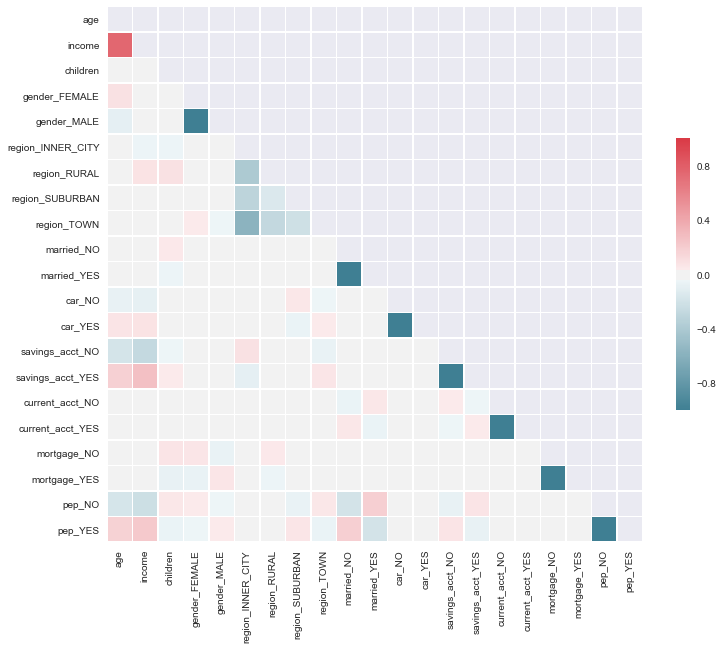

In [178]:
#visulize the correlation
import seaborn as sns
# Generate a mask for the upper triangle
mask = np.zeros_like(bk_ssf.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(bk_ssf.corr(), mask=mask, cmap=cmap, vmax=.3,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

__From correlation matrix and correlation plot above, we can see some significant correlation among some pair of attributes:__  

__interesting one:__  
strong positive correlation between normalized income and age (corr = 0.752) which indicate that older people tend to have higher income.

__non intersting ones:__  
the correlation beween dummy variables created from binarly variavlbes
e.g. correlation between male and female is equal to -1 which indicate they are perfectly negatively correlated but it does not provide any intersting story. 


## 8. Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?  

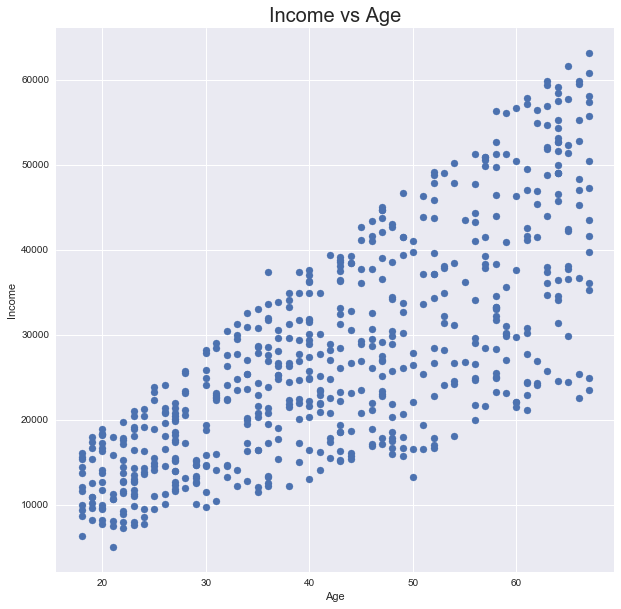

In [137]:
plt.figure(figsize=(10, 10))
plt.scatter(bankdf['age'], bankdf['income'], alpha=1)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income vs Age',size=20)

From the sccater plot above, we can clearly see that age and income are positively correlated

## 9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

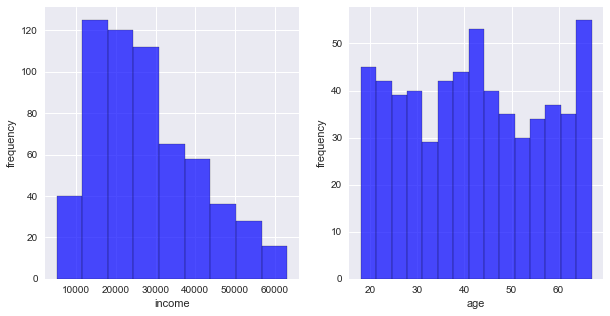

In [161]:
#histogram of numerical attirbutes
fig=plt.figure(figsize=(10, 5))
ax1=fig.add_subplot(1,2,1)
plt.hist(bankdf['income'],color='blue',alpha=0.7, bins =9,edgecolor="black")
plt.xlabel('income')
plt.ylabel('frequency')
ax2=fig.add_subplot(1,2,2)
plt.hist(bankdf['age'],color='blue',alpha=0.7, bins =15,edgecolor="black")
plt.xlabel('age')
plt.ylabel('frequency')

## 10. Using a bargraph, plot the distribution of the values of the region attribute.

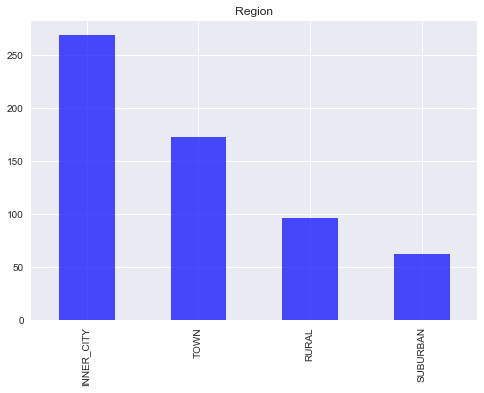

In [162]:
bankdf['region'].value_counts().plot(kind='bar',color='blue',alpha=0.7, title= 'Region')

## 11. Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

In [164]:
#Cross table
region_pep_crosstab = pd.crosstab(bankdf['region'], bankdf['pep'])
region_pep_crosstab

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


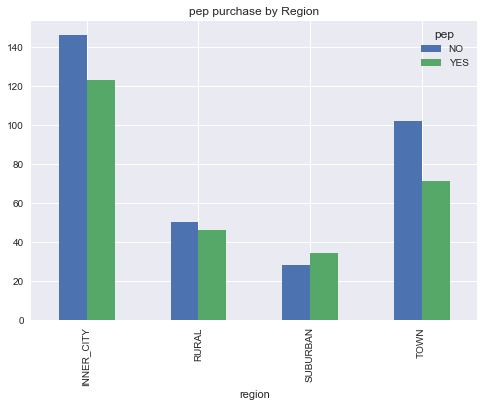

In [168]:
#bar chart
region_pep_crosstab.plot(kind='bar',title='pep purchase by Region')